# Lab 1.2 Introduction to NumPy and Matplotlib


# Exercises

1. Load the image `love_and_peace.jpg`.  Print the first row of the image.  (Display the numbers, don't `imshow()` it.  By "row", I mean the first row of tuples representing the RGB pixels.)

In [35]:
import imageio.v2 as imageio

image = imageio.imread('love_and_peace.jpg')
print(image[0])

[[17 16 12]
 [17 16 12]
 [19 18 16]
 ...
 [41 46 49]
 [42 45 50]
 [41 44 49]]


2. Now `imshow()` the first row of the image.  Why does it appear as a column, rather than a row?  Can you change your code so that it appears as a row of RGB pixels?

*Hint: look at the shape of the array after taking the first row.*

In [36]:
import matplotlib.pyplot as plt

# check the shape of the first row
print("Shape of the first row:", image[0].shape)

plt.imshow(image[0].reshape(1, -1, 3)) # Reshape to 1 row, keeping the color channels
plt.axis('off')
plt.show()

Shape of the first row: (2700, 3)


2. Crop out a 256x256 square patch from the center of the image and show it.  (By "crop out" I mean extract or copy pixels from the image.)

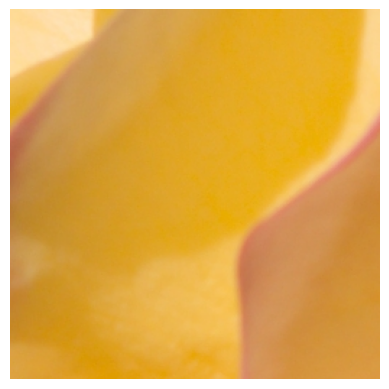

In [37]:
height, width, _ = image.shape
center_y, center_x = height // 2, width // 2
patch_size = 256
cropped_image = image[center_y - patch_size // 2 : center_y + patch_size // 2,
                      center_x - patch_size // 2 : center_x + patch_size // 2]
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

3. Make a new image where you copy the left half of the image and paste it on the right side (so that the new width is 1.5 times the old width).

Original shape: (2700, 2700, 3)
New image shape: (2700, 4050, 3)


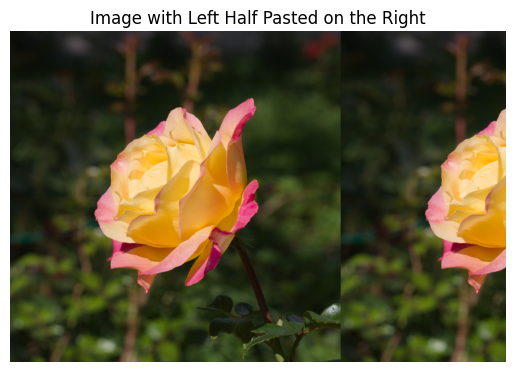

In [38]:
height, width, channels = image.shape

# Get the left half of the image
left_half = image[:, :width//2, :]

# concatenating the original image and the left half along the width (axis 1)
new_image = np.concatenate((image, left_half), axis=1)

print("Original shape:", image.shape)
print("New image shape:", new_image.shape)

plt.imshow(new_image)
plt.axis('off')
plt.title('Image with Left Half Pasted on the Right')
plt.show()

4. Repeat the image nine times in a 3x3 square pattern.  Try to do this using a NumPy function, not using a for loop or list comprehension!

*Hint: see `np.tile`.*

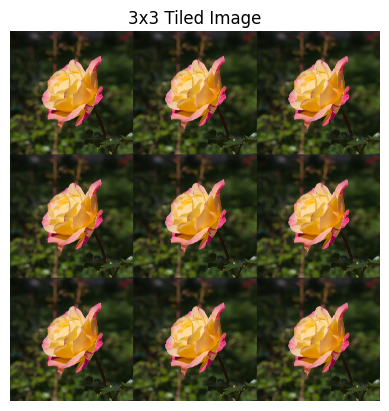

In [39]:
# repeat the image 3 times vertically and 3 times horizontally
tiled_image = np.tile(image, (3, 3, 1))

plt.imshow(tiled_image)
plt.axis('off')
plt.title('3x3 Tiled Image')
plt.show()

5. Reverse the order of the third axis and show the result (this will swap the red and blue color channels).

*Hint: you can reverse an axis with `::-1`*

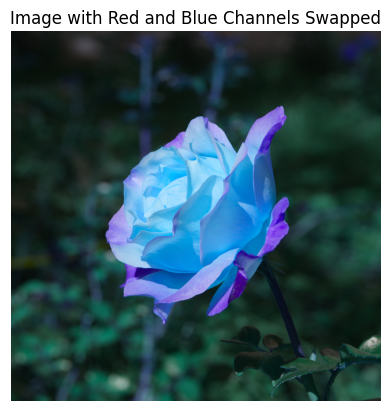

In [40]:
# swap red and blue channels
swapped_image = image[:, :, ::-1]

plt.imshow(swapped_image)
plt.axis('off')
plt.title('Image with Red and Blue Channels Swapped')
plt.show()

6. Multiply the image by two and show the result.  (I mean multiply the values in the array by two.)  Why does the data type of the image matter here?

*Hint: by "data type" I am referring to the `dtype` of the array.*

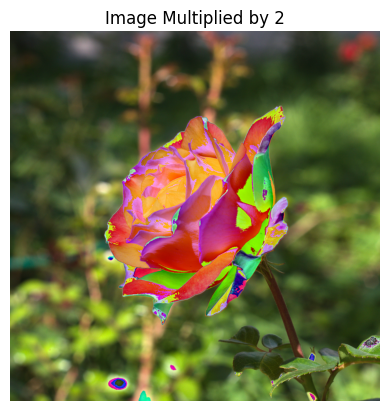

Image data type: uint8


In [41]:
multiplied_image = image * 2

# clip the values to [0, 255]
multiplied_image = np.clip(multiplied_image, 0, 255).astype(image.dtype)

plt.imshow(multiplied_image)
plt.axis('off')
plt.title('Image Multiplied by 2')
plt.show()
print("Image data type:", image.dtype)

The data type matters because it controls the allowed range of pixel values and how the math is performed. This is why the overflow code is important when dealing with images. For example, if the image is of type `uint8`, multiplying by 2 will cause values to overflow and wrap around.